<a href="https://colab.research.google.com/github/kimwoonggon/publicservant_AI/blob/master/01_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_%EA%B8%B0%EC%B4%88(IMDB_DATASET).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝을 위한 자연어 기초  
  
딥러닝을 활용하여 텍스트를 분류하기 위해서는  
**1) 토큰화, 2) 단어를 숫자로 변환하는 넘버링, 3) 1차원의 단어를 고차원으로 임베딩, 4) RNN이나 LSTM 같은 모형을 적용**하여 분류하는 4단계 과정을 거치게 됩니다,  
  
  

- **(토큰화)** 토큰화는 연속된 문장을 단어 단위로 잘라주는 것입니다.  
  


- **(넘버링)** 단어마다 순서를 정해 주면 다루기 상당히 편합니다.  
  


- **(임베딩)** 순서가 부여된 단어들은 컴퓨터 입장에서는 연관성을 알 수 없는 숫자들에 불과하다. 따라서 여러 문장을 훈련하여 단어간의 연관성을 부여해준다. 이 과정을 임베딩이라고 한다. 넘버링된 한 개의 숫자가 여러개의 숫자로 벡터화되게 됩니다.  
  
- **(RNN 적용)** 토큰화되고, 토큰화된 단어들이 순서가 부여된 후 임베딩된 문장들은 문장 하나 하나가 RNN 모형에 들어가서 훈련되게 되며, 최종적으로 문장을 분류하는 AI가 만들어지게 됩니다.

    본 튜토리얼에서는 자연어 처리의 기초를 배울 겸 imdb에 있는 영화 리뷰를 바탕으로 감성분석을 해보려고 합니다.

![Imgur](https://i.imgur.com/YFiEvOV.jpg)  
  


![Imgur](https://i.imgur.com/9Z2HwRx.jpg)  
  


![Imgur](https://i.imgur.com/ZABQd8V.jpg)  
  
  

![Imgur](https://i.imgur.com/70HAAbF.jpg)  

In [0]:
# IMDB 데이터셋 로드
from keras.datasets import imdb

# Numpy, Pandas, Matplotlib 로드
import numpy as np # 파이썬에서 수치를 다루기 위한 모듈
import pandas as pd # 파이썬에서 table을 다루기 위한 모듈
import matplotlib.pyplot as plt # 파이썬에서 그림을 그리기 위한 모듈
import tensorflow as tf
import os
%matplotlib inline


In [0]:
import warnings
import tensorflow as tf
warnings.filterwarnings(action='ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
tf.logging.set_verbosity(tf.logging.ERROR)

imdb 데이터셋을 로드하도록 하겠습니다.  
num_words = 20000은, 문장에 등장하는 단어들의 집합에서, 단어 등장 빈도수가 상위 20,000번째까지만 불러옵니다  
딥러닝 훈련에 쓸 train 데이터와 훈련된 딥러닝의 성능을 검증할 test 데이터를 불러옵니다.

In [0]:
help(imdb)

Help on module keras.datasets.imdb in keras.datasets:

NAME
    keras.datasets.imdb - IMDB sentiment classification dataset.

FUNCTIONS
    get_word_index(path='imdb_word_index.json')
        Retrieves the dictionary mapping words to word indices.
        
        # Arguments
            path: where to cache the data (relative to `~/.keras/dataset`).
        
        # Returns
            The word index dictionary.
    
    load_data(path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113, start_char=1, oov_char=2, index_from=3, **kwargs)
        Loads the IMDB dataset.
        
        # Arguments
            path: where to cache the data (relative to `~/.keras/dataset`).
            num_words: max number of words to include. Words are ranked
                by how often they occur (in the training set) and only
                the most frequent words are kept
            skip_top: skip the top N most frequently occurring words
                (which may not be informative)

In [0]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

17465344/17464789 [==============================] - 2s 0us/step


imdb 데이터셋에서 사용되는 단어와 그 단어에 해당하는 숫자가 맵핑되어 있는 딕셔너리를 불러옵니다. {단어:숫자, 단어:숫자,.....}  
또한 reverse_word_dict를 정의하여 {숫자:단어, 숫자:단어, ...} 형식으로도 만들어줍니다. 


In [0]:
word_dict = imdb.get_word_index()
reverse_word_dict = {k:v for v, k in word_dict.items()}

1646592/1641221 [==============================] - 1s 1us/step


In [0]:
word_dict

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

단어(이미 토큰화되어있음)와 숫자가 서로 매핑된 것을 볼 수 있다.  
이번 데이터셋은 별도의 토큰화 과정을 거치지 않도록 전처리가 되어 있다.

In [0]:
for i in x_train[0]:
    
    print(reverse_word_dict[i], end = " ")
print("\n")
print(x_train[0])

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then

In [0]:
for sent in x_train[0:50]:
  for i in sent:
    
      print(reverse_word_dict[i], end = " ")
  print("\n")
  print(x_train[0])
  print("\n")

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then

문장의 최대 길이, 평균 길이가 얼마나 되는지 알아본다  
문장의 최대 길이는 2494, 평균 길이는 238 정도임을 알 수 있다

maximun length : 2494
average length : 238.71364


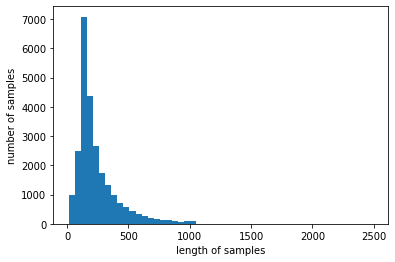

In [0]:
print('maximun length : {}'.format(max(len(l) for l in x_train)))
print('average length : {}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length')
plt.ylabel('number')
plt.show()

vocab_size는 imdb 데이터가 가지고 있는 단어의 개수이다.  
num_words를 20,000으로 했기 때문에 총 단어 개수는 20,000개이다.

In [0]:
vocab_size = 20000

imdb 데이터셋은 영화 리뷰가 positive인지, negative인지만 알면 된다.  
0인지 1인지만 구분하면 되는 binary classification 문제이다.


In [0]:
unique, bins = np.unique(y_train, return_counts=True)
print(unique)
print(bins)

[0 1]
[12500 12500]


케라스를 활용하기 위해서, 필요한 모듈들을 로드한다.  


In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Flatten, Dropout, GRU
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

문장의 최대 길이는 2494, 평균 길이는 238 정도였다.  
max_len 변수를 지정해서 문장의 최대 길이를 500으로 맞춰 주도록 하겠다.  
만약 500보다 긴 문장은 문장이 절단될 것이며, 500보다 짧은 문장은 길이를 500으로 맞추기 위해 0으로 채워지게 된다.

In [0]:
max_len = 500
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

훈련할 모델을 정의한다.
LSTM 대신에 LSTM과 성능은 비슷하면서도 속도는 빠른 GRU 모델을 사용하겠습니다.  
이진 분류이기 때문에 binary_crossentropy 방법으로 loss를 정의하고, adam optimization 방식으로 훈련을 시작하겠습니다.  
Embedding(vocab_size, 100) 이라는 레이어가 있는데, 우리가 imdb 데이터에 사용되는 총 20,000개의 문장을 단어 하나 하나마다 100차원의 임베딩하겠다는 레이어를 뜻합니다.

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 100)         2000000   
_________________________________________________________________
gru_5 (GRU)                  (None, 100)               60300     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 2,060,401
Trainable params: 2,060,401
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, batch_size=1024, epochs=3, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 149s 6ms/step - loss: 0.6800 - acc: 0.5909 - val_loss: 0.6160 - val_acc: 0.6990
Epoch 2/3
25000/25000 [==============================] - 146s 6ms/step - loss: 0.4092 - acc: 0.8164 - val_loss: 0.3682 - val_acc: 0.8430
Epoch 3/3
25000/25000 [==============================] - 146s 6ms/step - loss: 0.2224 - acc: 0.9155 - val_loss: 0.3216 - val_acc: 0.8754


훈련 과정을 그래프로 나타내어 봅니다

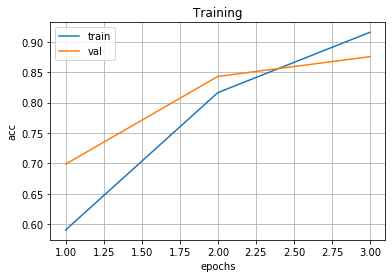

In [0]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('Training')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

F1 SCORE 확인하기

In [0]:
import sklearn.metrics as metrics

preds = model.predict(x_test)

In [0]:
print(preds)

[[0.06230575]
 [0.99592084]
 [0.81385434]
 ...
 [0.02467141]
 [0.03630751]
 [0.5253186 ]]


In [0]:
np.round(np.ravel(preds),0), y_test

(array([0., 1., 1., ..., 0., 0., 1.], dtype=float32),
 array([0, 1, 1, ..., 0, 0, 0]))

In [0]:
print(metrics.classification_report(y_test, np.round(np.ravel(preds),0)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     12500
           1       0.90      0.85      0.87     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

